In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [18]:
df=pd.read_csv('C:\\Users\\COMSOL\\Documents\\Real estate.csv')

In [19]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [20]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [22]:
df=df.rename(columns={'X1 transaction date':'date','X2 house age':'age','X3 distance to the nearest MRT station':'neighborhood','X4 number of convenience stores':'store','Y house price of unit area':'price'})

In [23]:
df.head()

,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
df.describe()


,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [25]:
df.isnull().sum()

No              0
date            0
age             0
neighborhood    0
store           0
X5 latitude     0
X6 longitude    0
price           0
dtype: int64

In [26]:
df1=df.drop(['No','date','X5 latitude','X6 longitude'],axis='columns')

In [27]:
df1.corr()

,age,neighborhood,store,price
age,1.000000,0.025622,0.049593,-0.210567
neighborhood,0.025622,1.000000,-0.602519,-0.673613
store,0.049593,-0.602519,1.000000,0.571005
price,-0.210567,-0.673613,0.571005,1.000000


In [28]:
df1.head()

,age,neighborhood,store,price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [29]:
df1.isnull().sum()

age             0
neighborhood    0
store           0
price           0
dtype: int64

In [30]:
df1.shape

(414, 4)

In [31]:
df1['age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

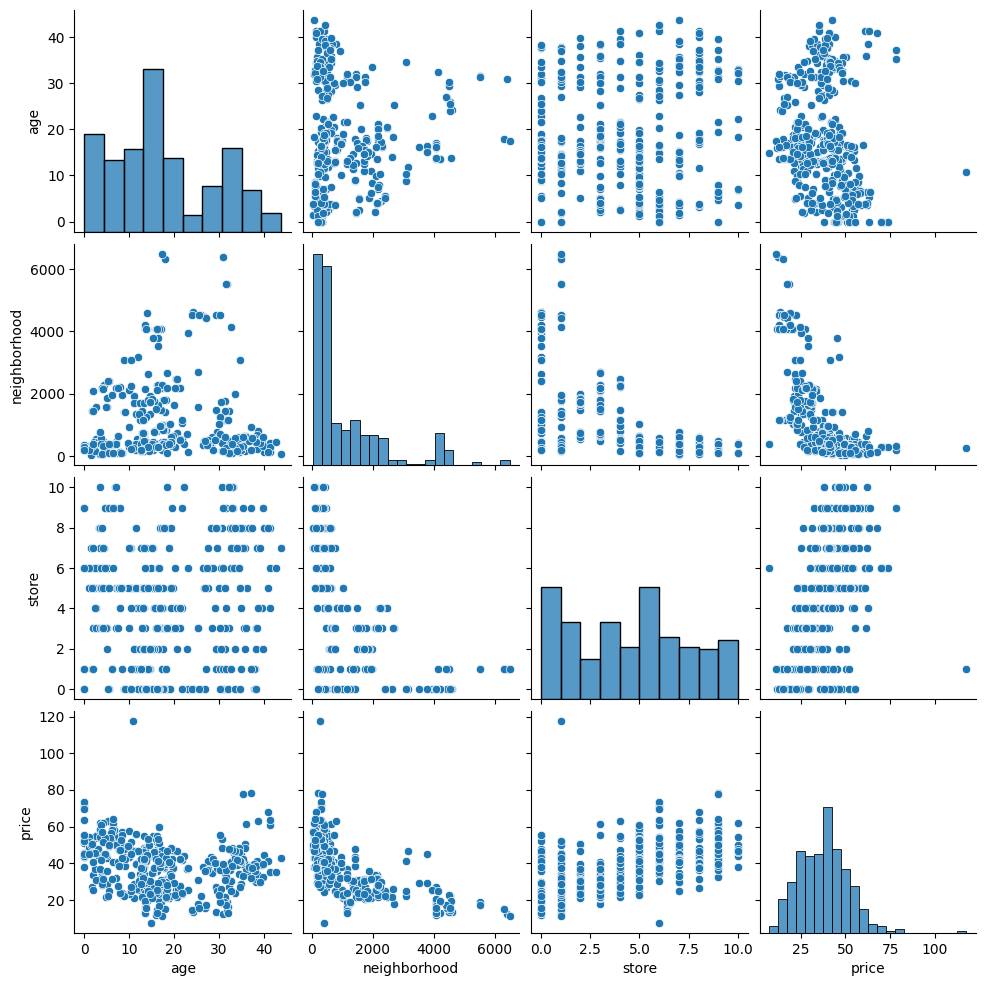

In [32]:

sns.pairplot(df1)

In [33]:
df1.price.max()

117.5

In [34]:
df1[df1.price>100]

,age,neighborhood,store,price
270,10.8,252.5822,1,117.5


In [35]:
df1=df1.drop([270])

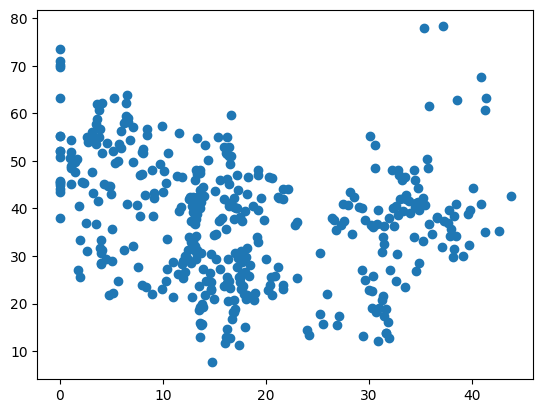

In [36]:
plt.scatter(df1['age'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")


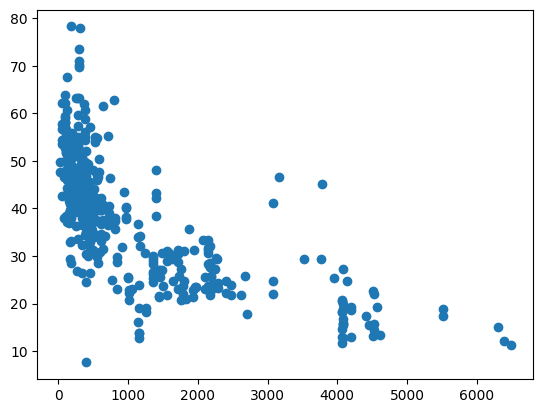

In [37]:
plt.scatter(df1['neighborhood'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")

<AxesSubplot:xlabel='age', ylabel='price'>

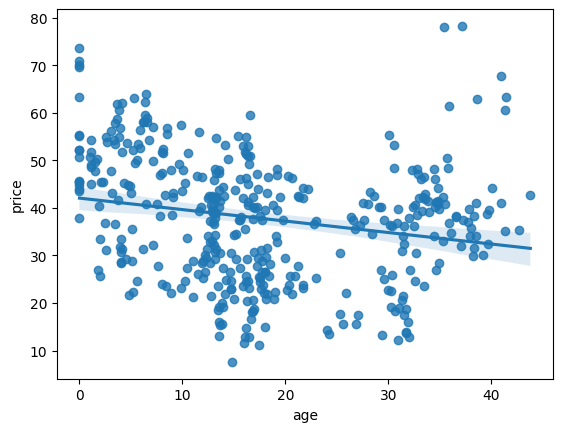

In [38]:
import seaborn as sns
sns.regplot(x="age",y="price", data=df1)

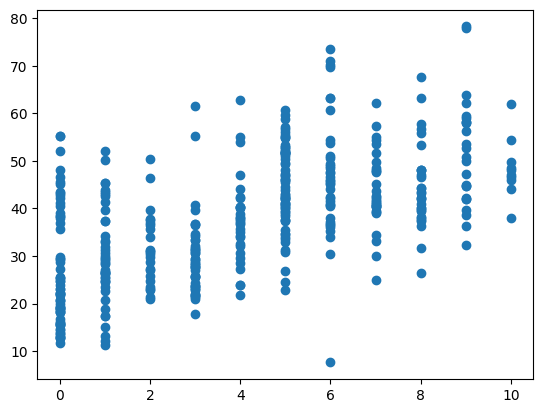

In [39]:
plt.scatter(df1['store'],df1['price'])
plt.show()

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

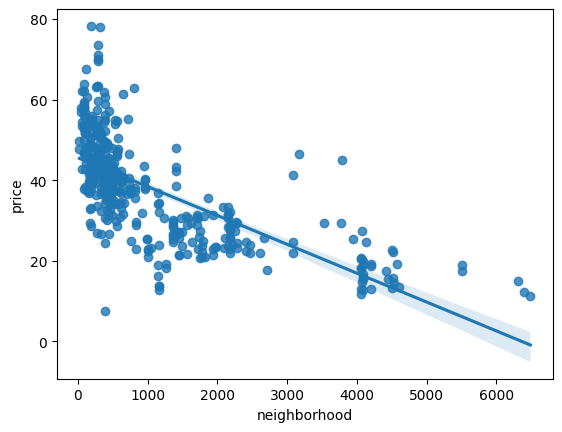

In [40]:

sns.regplot(x="neighborhood",y="price", data=df1)

<AxesSubplot:xlabel='X5 latitude', ylabel='price'>

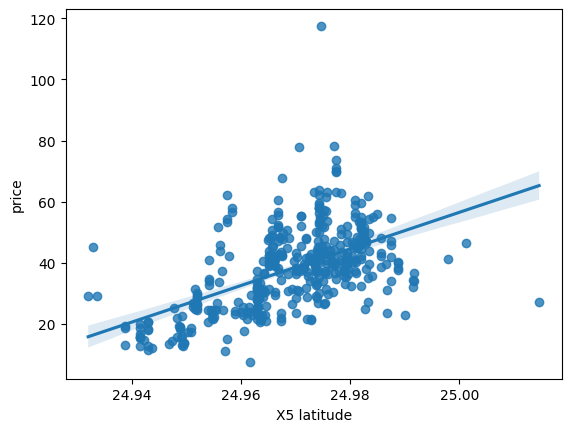

In [41]:
sns.regplot(x="X5 latitude",y="price", data=df)

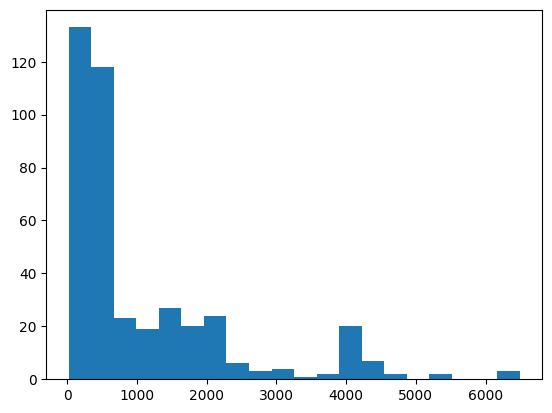

In [42]:
plt.hist(df.neighborhood, bins=20)
plt.show()

In [43]:
df.price.min()


7.6

In [44]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [45]:
X.head()

,age,neighborhood,store
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [46]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [48]:
X_train

,age,neighborhood,store
343,33.5,563.2854,8
162,16.0,4066.5870,0
264,32.6,493.6570,7
176,13.9,4573.7790,0
87,16.9,4066.5870,0
...,...,...,...
120,13.3,492.2313,5
319,34.6,272.6783,5
140,16.2,289.3248,5
295,18.2,2179.5900,3


In [49]:
from sklearn .preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
X_train=scaler.fit_transform(X_train)

In [51]:
X_test=scaler.transform(X_test)

In [52]:
import pickle
pickle.dump(scaler,open('scaling.pk1','wb'))

In [53]:
X_train

array([[ 1.36334031, -0.43501309,  1.33243598],
       [-0.17069646,  2.2406501 , -1.42216934],
       [ 1.284447  , -0.48819211,  0.98811032],
       [-0.35478087,  2.62802039, -1.42216934],
       [-0.09180314,  2.2406501 , -1.42216934],
       [-0.06550536,  0.79661138, -0.38919234],
       [-1.26643701, -0.8220925 ,  0.98811032],
       [-1.19630961, -0.53525353,  0.98811032],
       [ 0.00462203,  0.21536348, -1.07784367],
       [-1.57324436, -0.64144652,  0.64378465],
       [ 0.1010472 , -0.51305645,  0.29945899],
       [-0.02167574, -0.52028134,  1.33243598],
       [ 2.04708242, -0.55828669, -0.04486668],
       [ 1.55619065, -0.4228519 , -0.73351801],
       [-0.53886528, -0.45778   , -0.04486668],
       [-0.10933498,  2.25243331, -1.42216934],
       [-0.13563276, -0.64425179,  0.29945899],
       [ 1.81040246, -0.25063941, -0.04486668],
       [-0.28465347,  0.44628931, -0.73351801],
       [-0.70541784, -0.65200558,  0.98811032],
       [-0.42490826,  0.00884344, -0.044

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regression=LinearRegression()

In [56]:
regression.fit(X_train,Y_train)

LinearRegression()

In [57]:
print(regression.coef_)

[-2.76932439 -6.35840112  4.3833427 ]


In [58]:
print(regression.intercept_)

37.47575757575758


In [59]:
reg_pred=regression.predict(X_test)

In [60]:
reg_pred

array([36.60884827, 46.92948385, 33.05220456, 12.86398511, 36.25294996,
       32.0405576 , 42.95476413, 32.08253304, 39.52310889, 38.54522439,
       12.85874702, 28.31046021, 30.56355544, 17.41526614, 35.05420804,
       45.30497375, 45.79351796, 38.70026843, 31.95556951, 47.78248371,
       31.59862445, 37.36049639, 47.72788633, 39.36370577, 42.68885159,
       47.81817621, 33.21257947, 31.07747025, 40.19967928, 43.12469394,
       44.02202519, 40.19967928, 42.6461495 , 33.89860128, 46.99163217,
       35.14613304, 44.2082889 , 33.01837397, 35.73530995, 33.27862653,
       41.26478593, 41.10058853, 48.94882875, 52.62634397, 41.13990996,
       44.28166881, 43.26041136, 40.52176144, 43.86730357, 48.97310444,
       23.9912174 , 32.01628191, 42.57454072, 17.97535791, 53.50376406,
       30.20885948, 43.45461687, 28.17103564, 46.17134466, 47.76057346,
       33.04264965, 47.77829652, 49.14395955, 53.03773405, 27.6027835 ,
       44.77948088, 34.06920376, 32.08253304, 47.85767622, 32.87

In [61]:
score=regression.score(X_test,Y_test)

In [62]:
score

0.6757123237546374

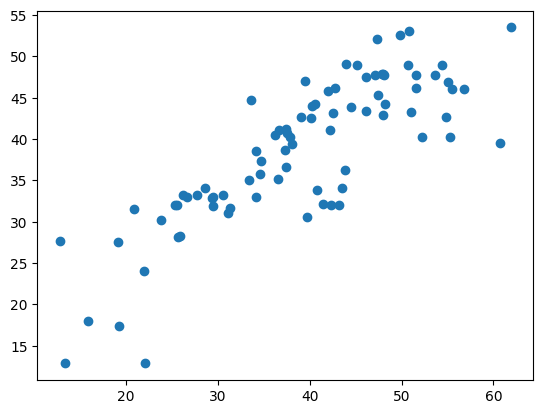

In [63]:
plt.scatter(Y_test,reg_pred)

In [64]:
from sklearn.metrics import r2_score
score1=r2_score(Y_test,reg_pred)
print(score1)

0.6757123237546374


In [65]:
import pickle

In [66]:
pickle.dump(regression,open('regmodel.pk1','wb'))

In [67]:
pickled_model=pickle.load(open('regmodel.pk1','rb'))